In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import random

In [2]:
N_SAMPLES = 10_000_000
key = jax.random.key(1)

## Scenario Setup

* 3 milestones
* Milestone 1 has a prob of 0.1
* Milestone 2 has a prob of 0.1
* Milestone 3 has a prob of 0.1

In [3]:
m1_p = 0.1
m2_p = 0.2
m3_p = 0.1

### End-to-End Simulation

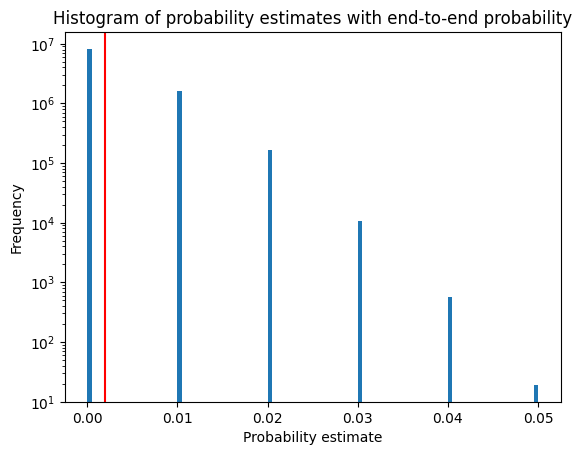

bias: -5.671754479408264e-07
variance: 1.9966419131378643e-05


In [4]:
end2end_trials = 100
end2end_prob = m1_p * m2_p * m3_p

# Each entry represents how many trials were successful
samples = jax.random.binomial(key, n=end2end_trials, p=end2end_prob, shape=(N_SAMPLES,))

# Each entry reprsents our probability estimate
prob_estimate = samples / end2end_trials


# plot the range of probability estimates
plt.title("Histogram of probability estimates with end-to-end probability")
plt.hist(prob_estimate, bins=100, log=True)
plt.xlabel("Probability estimate")
plt.ylabel("Frequency")
# plot the true probability
plt.axvline(end2end_prob, color='r')
plt.show()

# print bias and variance of estimates
bias = jnp.mean(prob_estimate) - end2end_prob
variance = jnp.var(prob_estimate)

print(f"bias: {bias}")
print(f"variance: {variance}")

## Milestone Simulation

In [5]:
key = jax.random.key(random.randint(0, 1000))

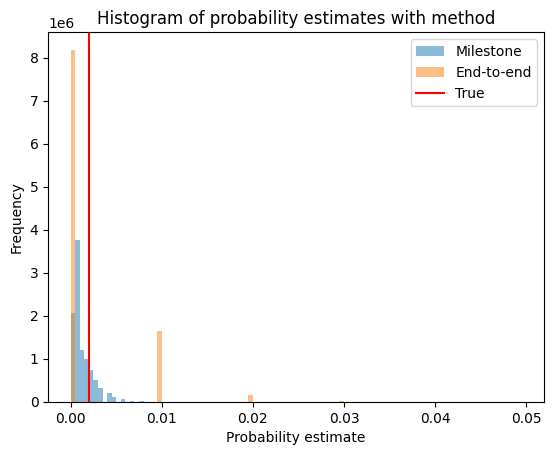

bias: -0.0007223185384646058
variance: 1.2865568805864314e-06


In [6]:
milestone_trials = 100

# Each entry represents how many trials were successful
m1_samples = jax.random.binomial(key, n=milestone_trials, p=m1_p, shape=(N_SAMPLES,))
m2_samples = jax.random.binomial(key, n=milestone_trials, p=m1_p, shape=(N_SAMPLES,))
m3_samples = jax.random.binomial(key, n=milestone_trials, p=m1_p, shape=(N_SAMPLES,))

m1_prob_estimate = m1_samples / milestone_trials
m2_prob_estimate = m2_samples / milestone_trials
m3_prob_estimate = m3_samples / milestone_trials

end2end_prob_estimate = m1_prob_estimate * m2_prob_estimate * m3_prob_estimate

# plot the range of probability estimates
n_bins = 100
min_prob = 0
max_prob = 0.05
binwidth = (max_prob - min_prob) / n_bins
bins = jnp.arange(min_prob, max_prob, binwidth)

plt.title("Histogram of probability estimates with method")
plt.hist(end2end_prob_estimate, bins=bins, label="Milestone", alpha=0.5)
plt.hist(prob_estimate, bins=bins, label="End-to-end", alpha=0.5)

plt.xlabel("Probability estimate")
plt.ylabel("Frequency")
# plot the true probability
plt.axvline(end2end_prob, color='r', label="True")
plt.legend()
plt.show()

# print bias and variance of estimates
bias = jnp.mean(end2end_prob_estimate) - end2end_prob
variance = jnp.var(end2end_prob_estimate)

print(f"bias: {bias}")
print(f"variance: {variance}")